In [1]:
%pwd

'/home/larry/tensorflow_prac'

In [2]:

import tensorflow as tf


In [3]:


saver=tf.train.import_meta_graph("/tmp/my_model_final.ckpt.meta")

weii = tf.get_default_graph().get_tensor_by_name("weights:0")
biass = tf.get_default_graph().get_tensor_by_name("bias:0")


In [4]:
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")  # this restores the graph's state
    weight_=sess.run(weii)
    bias_=sess.run(biass)
    print(sess.run(weii[:2]))
    print(sess.run(biass))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt
[[ 0.01690356  0.01895099  0.00312085  0.00124548  0.01772492  0.00087697
   0.00215069 -0.0063635  -0.00681684 -0.00896729]
 [-0.01044434 -0.00679425 -0.01114177 -0.0017085   0.02148143  0.01000706
  -0.00057806 -0.00435588  0.01197962  0.00849446]]
[[-1.5453975   1.7959048   0.36945492 -0.78058463  0.3982691   2.5358472
  -0.7676812   1.4735827  -2.6268256  -0.49825197]]


## how to use the restored weight and bias to do application ?

In [5]:
import utils
import numpy as np

In [6]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
# Step 1: Read in data
mnist_folder = 'data/mnist'
utils.download_mnist(mnist_folder)
_, _, test = utils.read_mnist(mnist_folder, flatten=True)

data/mnist/train-images-idx3-ubyte.gz already exists
data/mnist/train-labels-idx1-ubyte.gz already exists
data/mnist/t10k-images-idx3-ubyte.gz already exists
data/mnist/t10k-labels-idx1-ubyte.gz already exists


In [8]:
type(test)

tuple

In [12]:
test[1].shape

(10000, 10)

In [13]:
test_image=test[0]

In [14]:
test_image.shape

(10000, 784)

In [15]:
test_image[0].shape

(784,)

In [16]:
ttimg=np.array([test_image[0]])

In [17]:
ttimg.shape

(1, 784)

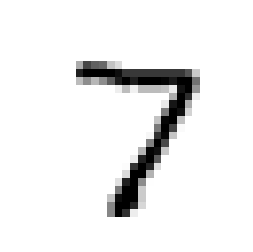

In [18]:
pic = ttimg
pic = pic.reshape(28, 28)
plt.imshow(pic, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

### can we recognize this number using our stored weights and bias ?

In [19]:
wei=tf.constant(weight_)
bbs=tf.constant(bias_)
imm=tf.constant(ttimg)
loog = tf.matmul(imm, wei) + bbs 
preds = tf.nn.softmax(loog)
correct_preds = tf.argmax(preds, 1)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(preds))
    print(sess.run(correct_preds))

[[2.4098013e-12 1.4885593e-20 1.6285515e-12 2.2331311e-03 6.2845809e-09
  1.1951441e-06 7.9812600e-19 9.9774373e-01 3.8375461e-07 2.1579035e-05]]
[7]


### how about another number ?

In [20]:
ttimg=np.array([test_image[5]])
print(ttimg.shape)

(1, 784)


### Make some noise 

In [21]:
ttimg[0,5]=1.0
ttimg[0,10]=0.7

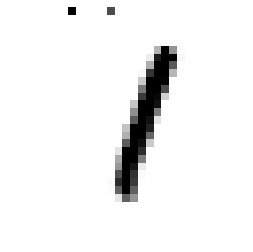

In [22]:
pic = ttimg
pic = pic.reshape(28, 28)
plt.imshow(pic, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

In [24]:
imm=tf.constant(ttimg)
loog = tf.matmul(imm, wei) + bbs 
preds = tf.nn.softmax(loog)
correct_preds = tf.argmax(preds, 1)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(preds))
    print(sess.run(correct_preds))

[[6.5430672e-10 9.9124837e-01 2.4559074e-03 6.7438639e-04 2.7151341e-07
  1.7480726e-05 1.5431182e-06 2.9867108e-03 2.2294761e-03 3.8571720e-04]]
[1]


### how about another number ?

In [25]:
ttimg=np.array([test_image[15]])
print(ttimg.shape)

(1, 784)


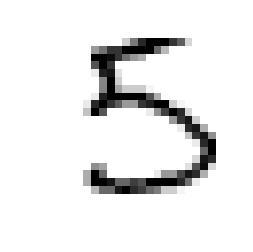

In [26]:
pic = ttimg
pic = pic.reshape(28, 28)
plt.imshow(pic, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

In [27]:
ttimg[0,5]=1.0
ttimg[0,10]=0.7

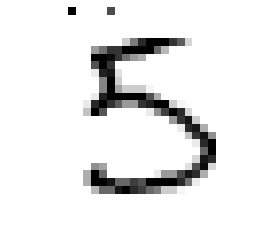

In [28]:
pic = ttimg
pic = pic.reshape(28, 28)
plt.imshow(pic, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

In [29]:
imm=tf.constant(ttimg)
loog = tf.matmul(imm, wei) + bbs 
preds = tf.nn.softmax(loog)
correct_preds = tf.argmax(preds, 1)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(preds))
    print(sess.run(correct_preds))

[[3.8888679e-06 6.3809644e-06 2.5421221e-05 1.6515842e-02 1.3673634e-08
  9.7567981e-01 3.2830667e-06 1.1325258e-14 7.7653811e-03 2.4095760e-08]]
[5]
